# Использование линейных моделей МО для определения целесобразности покупки наиболее выгодных коров

**Описание данных:**

Будем работать с тремя датасетами: ferma_main.csv, ferma_dad.csv и cow_buy.csv


- Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
    - id — уникальный идентификатор коровы.
    - Удой, кг — масса молока, которую корова даёт в год (в килограммах).
    - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
    - Сырой протеин, г — содержание сырого протеина в корме (в граммах).
    - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
    - Порода — порода коровы.
    - Тип пастбища — ландшафт лугов, на которых паслась корова.
    - порода папы_быка — порода папы коровы.
    - Жирность,% — содержание жиров в молоке (в процентах).
    - Белок,% — содержание белков в молоке (в процентах).
    - Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
    - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

  Признаки в датасете ferma_main.csv можно разделить на группы.
    - Характеристики коровы: id, Порода, порода папы_быка, Возраст.
    - Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
    - Характеристика пастбища: Тип пастбища.
    - Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

  Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.


- Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
    - id — уникальный идентификатор коровы.
    - Имя Папы — имя папы коровы.


- Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
    - Порода — порода коровы.
    - Тип пастбища — ландшафт лугов, на которых паслась корова.
    - порода папы_быка — порода папы коровы.
    - Имя_папы — имя папы коровы.
    - Текущая_жирность,% — содержание жиров в молоке (в процентах).
    - Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
    - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
- Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

**Описание проекта:** IT-компания выполняет на заказ проекты по машинному обучению. К ней обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
- Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

**Цель проекта:** Разработать модели машинного обучения с помощью которых можно будет отобрать коров, которые дают не менне 6000 килограммов вкусного молоака в год.


**План работ:**
* Открыть файл с данными и изучить общую информацию
* Предобработать данные
* Проведите исследовательский анализ данных
* Проведите корреляционный анализ принзнаков 
* Решить задачи регрессии
* Решить задачи классификации
* Составить итоговые выводы

## Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (
    r2_score, 
    mean_absolute_error, 
    mean_squared_error, 
    accuracy_score, 
    confusion_matrix, 
    recall_score, 
    precision_score
)

In [2]:
!pip install scikit-learn==1.1.3 -q

In [3]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal = ',')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal = ',')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal = ',')

In [4]:
ferma_main.info()
ferma_main.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [5]:
ferma_dad.info()
ferma_dad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [6]:
cow_buy.info()
cow_buy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


**Вывод:** Данные соответствуют описанию задачи. Названия и типы некоторых столбцов необходимо будет изменить в соответствии со стандартами оформления данных на этапе предобработки.

##  Предобработка данных

### Датафрейм ferma_main

In [7]:
#Приводим названия столбцов датафрейма ferma_main к нормальному оформлению
ferma_main.columns = ['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода',
                      'тип_пастбища', 'порода_папы_быка', 'жирность', 'белок', 'вкус_молока', 'возраст']
ferma_main.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [8]:
#Проверка пропусков
ferma_main.isna().sum()

id                  0
удой                0
эке                 0
сырой_протеин       0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность            0
белок               0
вкус_молока         0
возраст             0
dtype: int64

In [9]:
#Поиск дубликатов и их удаление
print('Количество дубликатов до форматирования:', ferma_main.duplicated().sum())
ferma_main = ferma_main.drop_duplicates()
print('Количество дубликатов после форматирования:', ferma_main.duplicated().sum())

Количество дубликатов до форматирования: 5
Количество дубликатов после форматирования: 0


In [10]:
#Обработка неявных дубликатов
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace('Равнинные', 'Равнинное')
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')

### Датафрейм ferma_dad

In [11]:
#Приводим названия столбцов датафрейма ferma_dad к нормальному оформлению
ferma_dad.columns = ['id', 'имя_папы']
ferma_dad.head()

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [12]:
#Проверка пропусков
ferma_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

In [13]:
#Поиск дубликатов и их удаление
print('Количество дубликатов:', ferma_dad.duplicated().sum())

Количество дубликатов: 0


### Датафрейм cow_buy

In [14]:
#Приводим названия столбцов датафрейма cow_buy к нормальному оформлению
cow_buy.columns = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 
                   'жирность', 'белок', 'возраст']
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [15]:
#Проверка пропусков
cow_buy.isna().sum()

порода              0
тип_пастбища        0
порода_папы_быка    0
имя_папы            0
жирность            0
белок               0
возраст             0
dtype: int64

In [16]:
#Поиск дубликатов и их удаление
#print('Количество дубликатов:', cow_buy.duplicated().sum())
#cow_buy = cow_buy.drop_duplicates()
#print('Количество дубликатов после форматирования:', cow_buy.duplicated().sum())

**Вывод:** На этапе предобработке данных названия столбцов и их типы данных были приведены к нормальному виду во всех датафремах, также были удалены явные дубликаты, а неявные обработаны. Пропуски в данных отсутствовали.

## Исследовательский анализ данных

### Датафрейм ferma_main

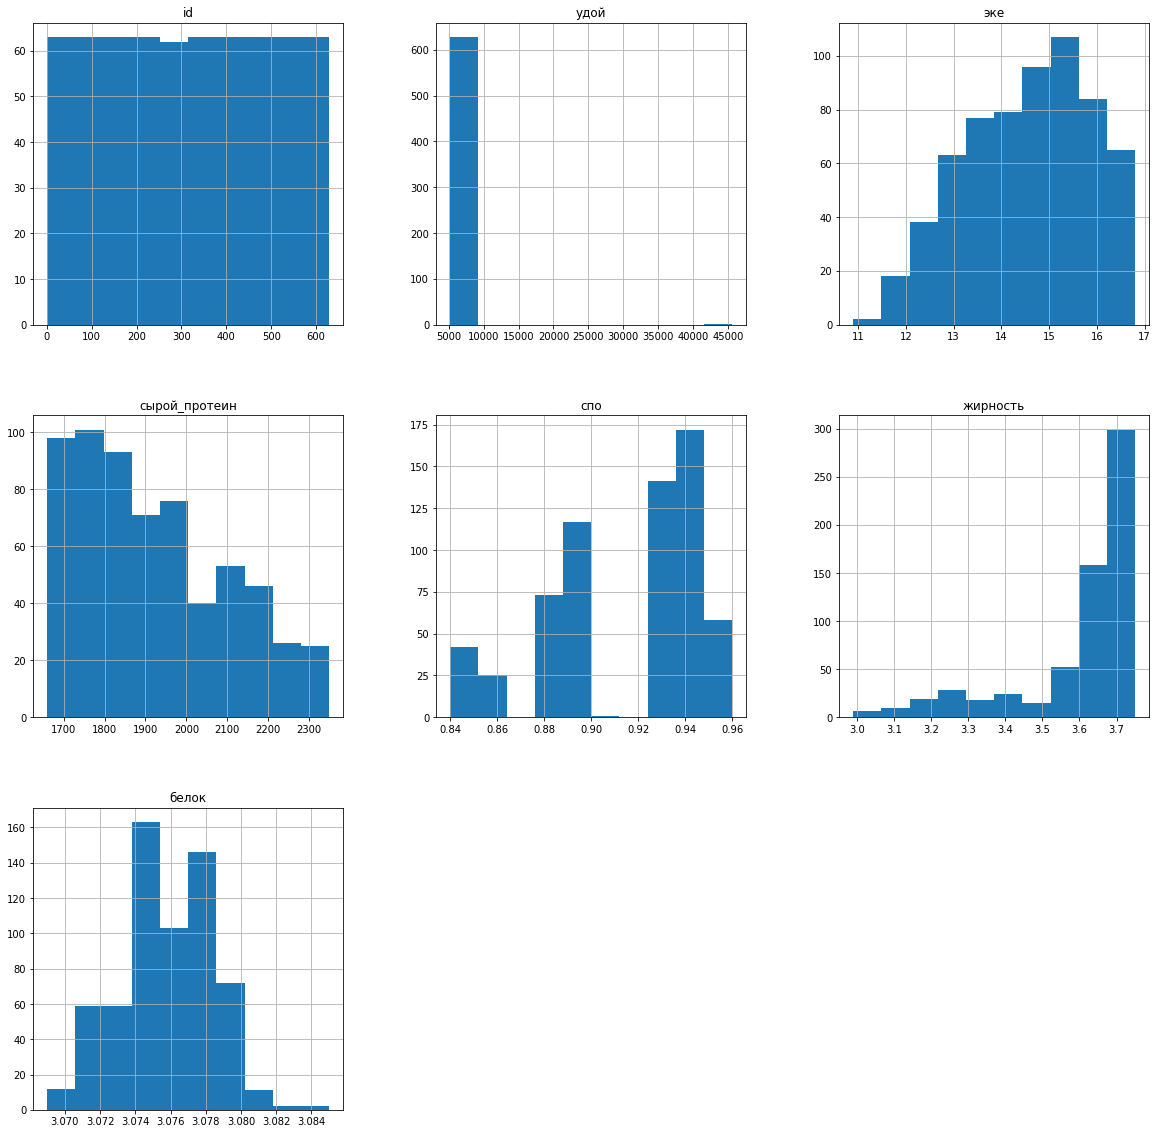

In [17]:
ferma_main.hist(figsize=(20, 20));

**Вывод:** Нормальное распределение наблюдается только в признаках: "удой" и "эке". В признаке "белок" оно бимодальное, а в "сырой_протеин", "спо" и "жирность" - ненормальное.


In [18]:
ferma_main.describe()

,id,удой,эке,сырой_протеин,спо,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [19]:
#Устраняем выбросы в удое, путем удаления аномальных значений.
ferma_main = ferma_main[ferma_main['удой'] < 10000]

In [20]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                628 non-null    int64  
 1   удой              628 non-null    int64  
 2   эке               628 non-null    float64
 3   сырой_протеин     628 non-null    int64  
 4   спо               628 non-null    float64
 5   порода            628 non-null    object 
 6   тип_пастбища      628 non-null    object 
 7   порода_папы_быка  628 non-null    object 
 8   жирность          628 non-null    float64
 9   белок             628 non-null    float64
 10  вкус_молока       628 non-null    object 
 11  возраст           628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.8+ KB


Вис Бик Айдиал     0.592357
РефлешнСоверинг    0.407643
Name: порода, dtype: float64

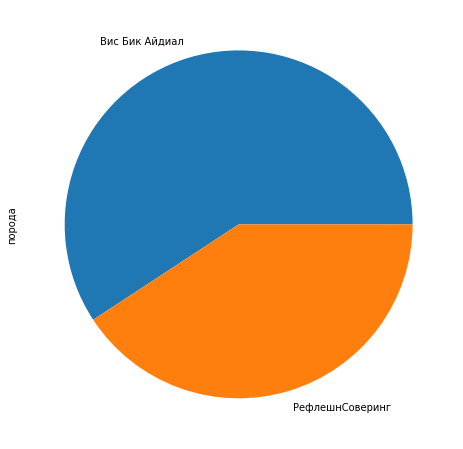

In [21]:
ferma_main['порода'].value_counts().plot(kind='pie', grid=True, figsize=(16, 8))
ferma_main['порода'].value_counts() / ferma_main['порода'].count()

Холмистое    0.557325
Равнинное    0.442675
Name: тип_пастбища, dtype: float64

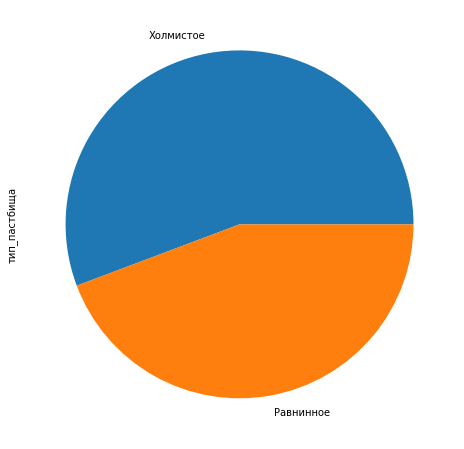

In [22]:
ferma_main['тип_пастбища'].value_counts().plot(kind='pie', grid=True, figsize=(16, 8))
ferma_main['тип_пастбища'].value_counts() / ferma_main['тип_пастбища'].count()

Айдиал     0.504777
Соверин    0.495223
Name: порода_папы_быка, dtype: float64

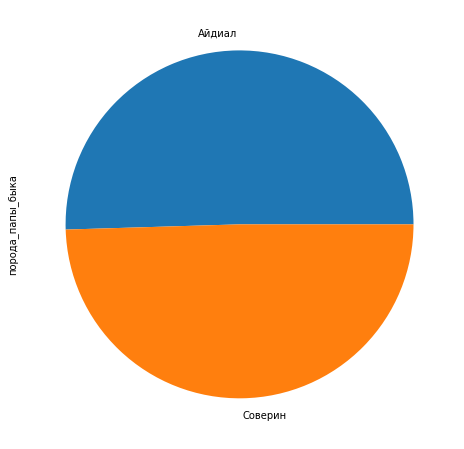

In [23]:
ferma_main['порода_папы_быка'].value_counts().plot(kind='pie', grid=True, figsize=(16, 8))
ferma_main['порода_папы_быка'].value_counts() / ferma_main['порода_папы_быка'].count()

вкусно       0.589172
не вкусно    0.410828
Name: вкус_молока, dtype: float64

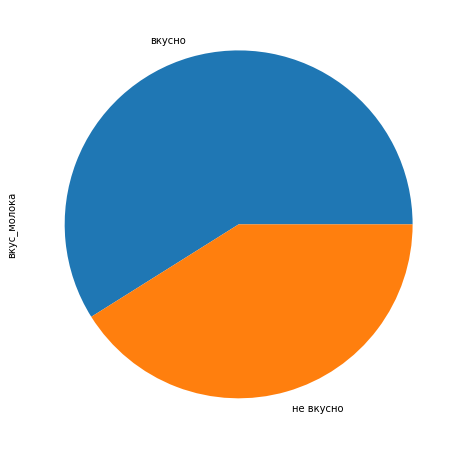

In [24]:
ferma_main['вкус_молока'].value_counts().plot(kind='pie', grid=True, figsize=(16, 8))
ferma_main['вкус_молока'].value_counts() / ferma_main['вкус_молока'].count()

более_2_лет    0.824841
менее_2_лет    0.175159
Name: возраст, dtype: float64

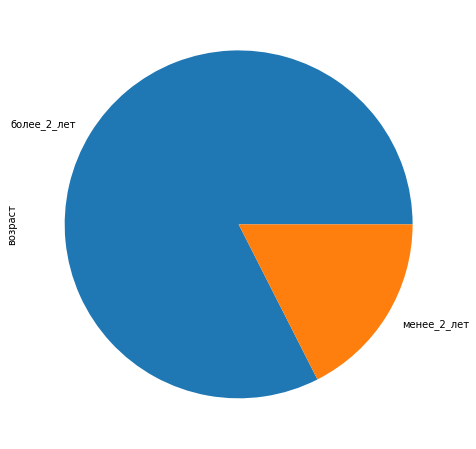

In [25]:
ferma_main['возраст'].value_counts().plot(kind='pie', grid=True, figsize=(16, 8))
ferma_main['возраст'].value_counts() / ferma_main['возраст'].count()

### Датафрейм ferma_dad

Барин       0.381558
Буйный      0.341812
Соловчик    0.174881
Геркулес    0.101749
Name: имя_папы, dtype: float64

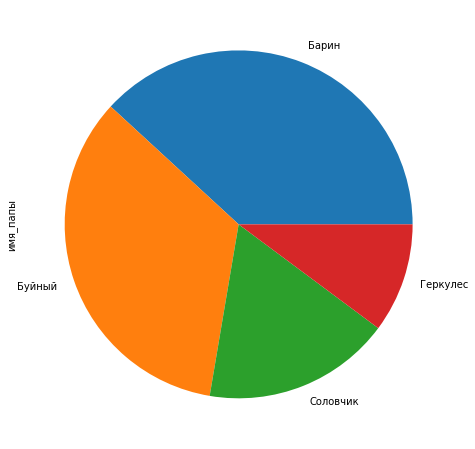

In [26]:
ferma_dad['имя_папы'].value_counts().plot(kind='pie', grid=True, figsize=(16, 8))
ferma_dad['имя_папы'].value_counts() / ferma_dad['имя_папы'].count()

### Датафрейм cow_buy

array([[<AxesSubplot:title={'center':'жирность'}>,
        <AxesSubplot:title={'center':'белок'}>]], dtype=object)

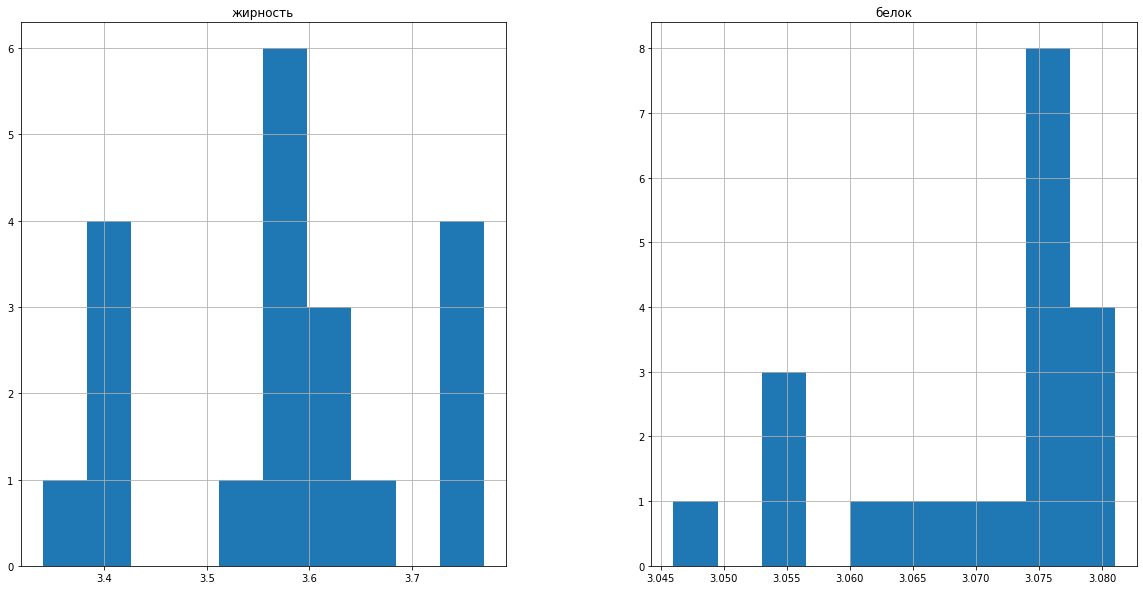

In [27]:
cow_buy.hist(figsize=(20, 10))

In [28]:
cow_buy.describe()

,жирность,белок
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


In [29]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   порода            20 non-null     object 
 1   тип_пастбища      20 non-null     object 
 2   порода_папы_быка  20 non-null     object 
 3   имя_папы          20 non-null     object 
 4   жирность          20 non-null     float64
 5   белок             20 non-null     float64
 6   возраст           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


РефлешнСоверинг    0.55
Вис Бик Айдиал     0.45
Name: порода, dtype: float64

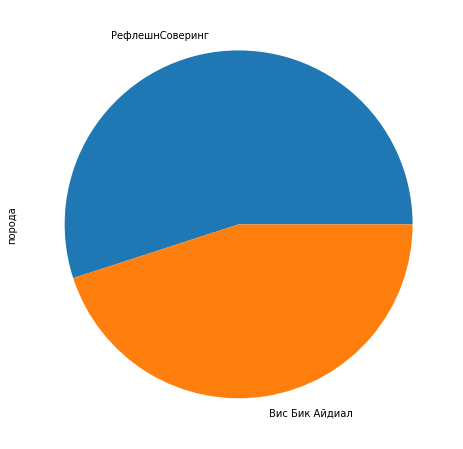

In [30]:
cow_buy['порода'].value_counts().plot(kind='pie', grid=True, figsize=(16, 8))
cow_buy['порода'].value_counts() / cow_buy['порода'].count()

равнинное    0.55
холмистое    0.45
Name: тип_пастбища, dtype: float64

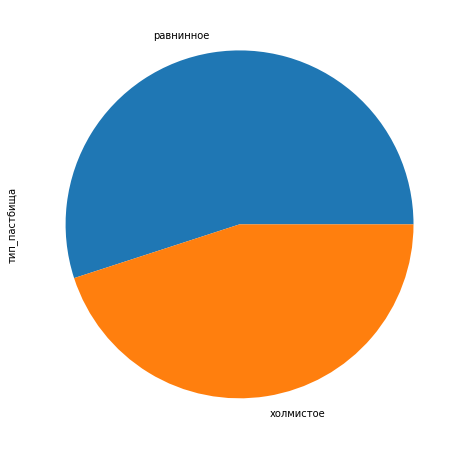

In [31]:
cow_buy['тип_пастбища'].value_counts().plot(kind='pie', grid=True, figsize=(16, 8))
cow_buy['тип_пастбища'].value_counts() / cow_buy['тип_пастбища'].count()

Соверин    0.6
Айдиал     0.4
Name: порода_папы_быка, dtype: float64

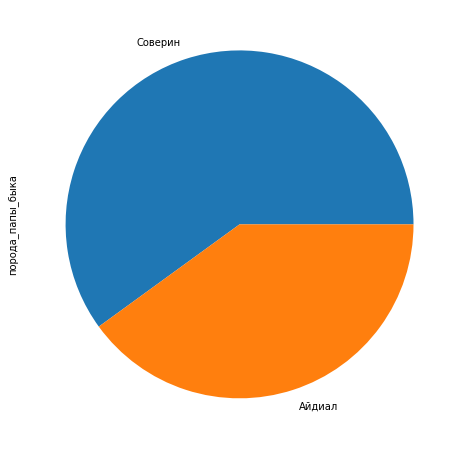

In [32]:
cow_buy['порода_папы_быка'].value_counts().plot(kind='pie', grid=True, figsize=(16, 8))
cow_buy['порода_папы_быка'].value_counts() / cow_buy['порода_папы_быка'].count()

Буйный      0.4
Геркулес    0.3
Барин       0.2
Соловчик    0.1
Name: имя_папы, dtype: float64

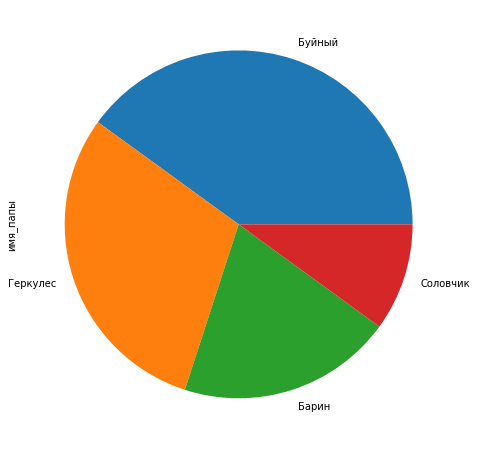

In [33]:
cow_buy['имя_папы'].value_counts().plot(kind='pie', grid=True, figsize=(16, 8))
cow_buy['имя_папы'].value_counts() / cow_buy['имя_папы'].count()

более_2_лет    0.75
менее_2_лет    0.25
Name: возраст, dtype: float64

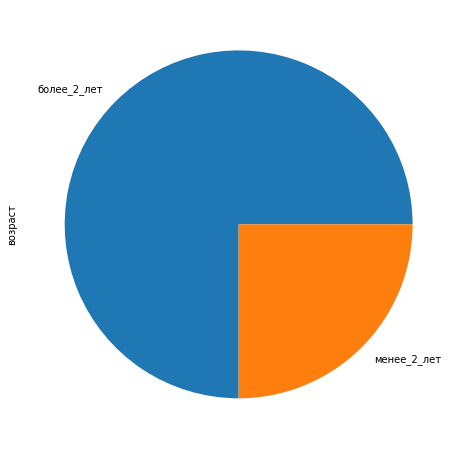

In [34]:
cow_buy['возраст'].value_counts().plot(kind='pie', grid=True, figsize=(16, 8))
cow_buy['возраст'].value_counts() / cow_buy['возраст'].count()

**Вывод:** 
- Датафрейм ferma_main:
    - В удое присутсвтвовали выбросы в районе 45000, скорее всего данные записаны некорректно. Было принятно решение удалить эти значения. В остальных признаках аномалий и выбросов замечено не было.
    - Нормальное распределение наблюдается только в признаках: "удой" и "эке". В признаке "белок" оно бимодальное, а в "сырой_протеин", "спо" и "жирность" - ненормальное.
    - Коров породы Вис Бик Айдиал больше, чем РефлешнСоверинг примерно на 10%  (0.593005 и 0.406995 соответсвенно)
    - Коровы немного чаще предпочитают Холмистое пастбище, а не Равнинное (0.558029 и 0.441971 соответсвенно)
    - Отцами выступают породы Айдиал и Соверин практически в равно количестве.
    - Коровы дают примерно 41% невкусного молока, это довольно выоский показатель, учитывая что он является основной метрикой заказчика.
    - 82.5% коров старше двух лет.


- Датафрейм ferma_dad:
    - Самым плодовитым отцом является Барин, на него приходится 38.15% всего потомтсва фермы, далее идет Буйный с долей 34.18%. У Соловчика около 17.48%, а у Геркулеса - 10.17. На первых двух быков приходится около трех четвертых потомтсва.


- Датафрейм cow_buy:
    - Показатели белка и жирности имеют бимодальное распределение. Медиана и среднее значение сопоставимы друг с другом.
    - Коровы пород РефлешнСоверинг и Вис Бик Айдиал представлены в равном объеме.
    - Коровы пасущуиеся на равнинное и в холмистой местности также представлены в равном объеме.
    - Отцом большей части коров является бык породы Соверин (62.5%) Айдиал же - 37.5%.
    - Самым плодовитым отцом является Буйный, на него приходится 43.75% всего потомтсва cow_buy, далее идет Геркулес с долей 31.25%. У Барина и Соловчика равная доля в 12.5%. На первых двух быков приходится 75% потомтсва cow_buy.
    - В cow_buy большинство буренек старше 2 лет (68.75%), младше же только 31.25%


## Корреляционный анализ

<AxesSubplot:>

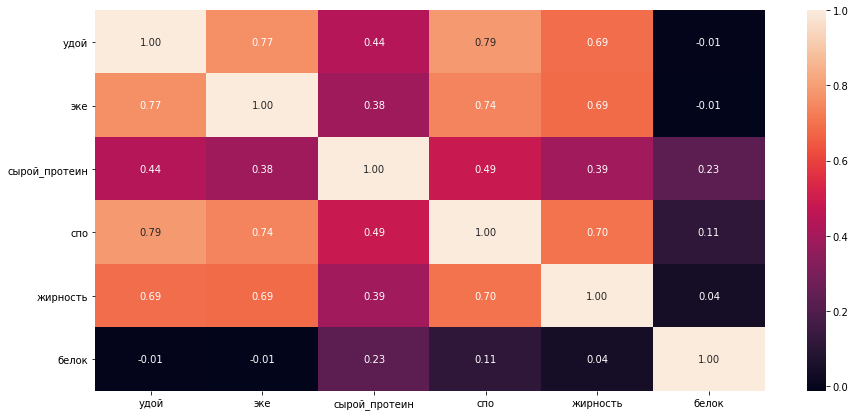

In [35]:
plt.figure(figsize=(15, 7))
fmcor = ferma_main.drop('id', axis=1).corr(method='spearman')
sns.heatmap(fmcor, annot=True, fmt='.2f')

In [36]:
def scatter(qual):
    quantity = ['эке', 'сырой_протеин', 'спо', 'жирность', 'белок']

    for feature in quantity:
        plt.figure(figsize=(5, 5))
        sns.scatterplot(data=ferma_main, x=feature, y='удой', hue=qual, palette='viridis')
        plt.title(f'Диаграмма рассеяния для удой и {feature} с учетом {qual}')
        plt.show()

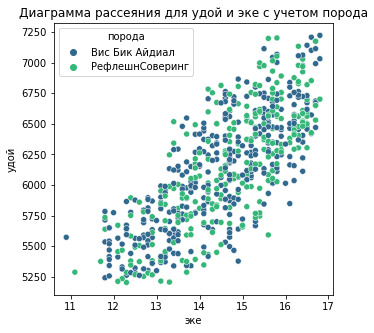

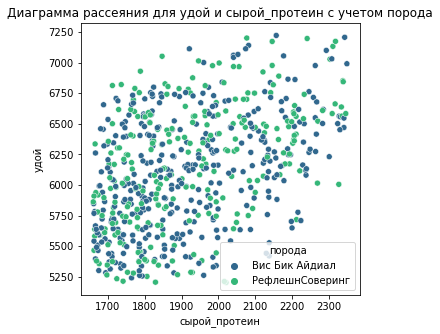

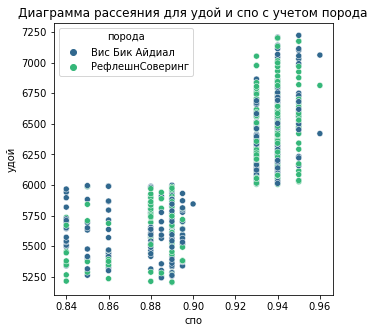

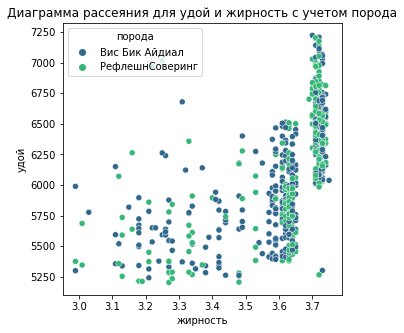

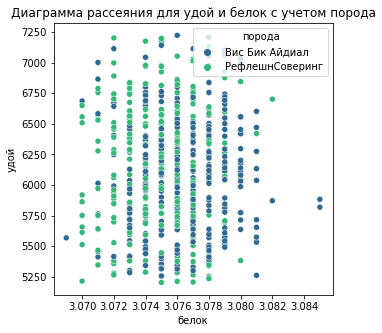

In [37]:
scatter('порода')

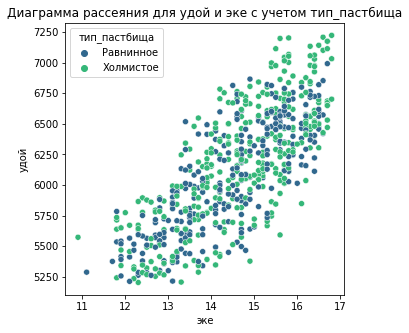

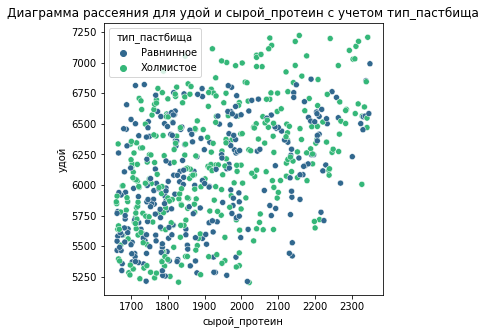

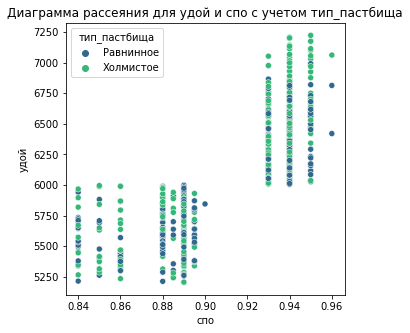

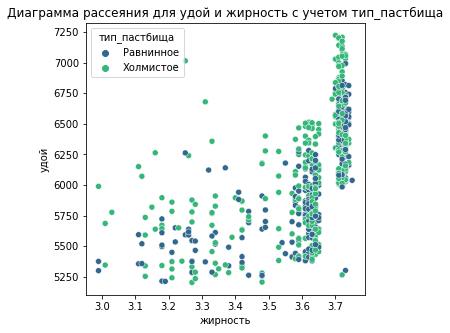

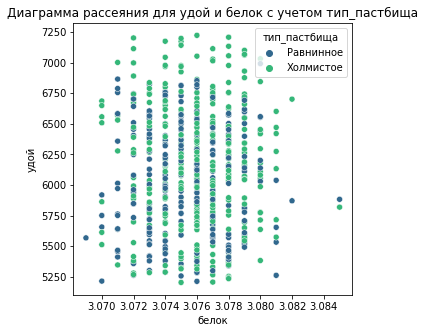

In [38]:
scatter('тип_пастбища')

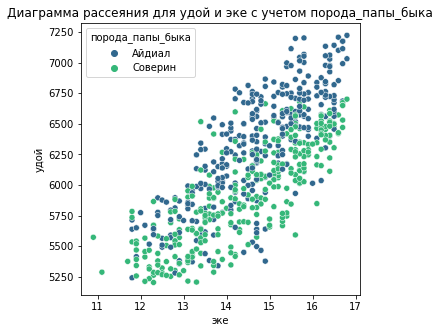

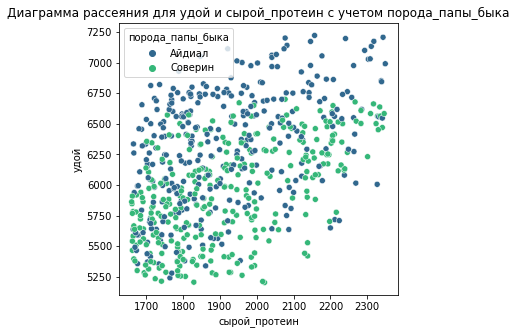

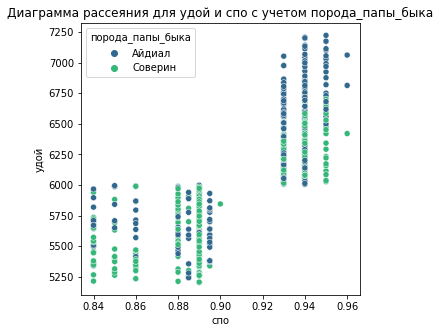

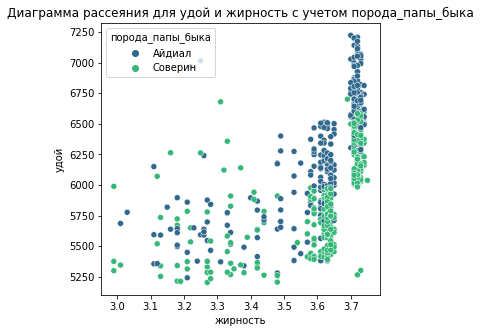

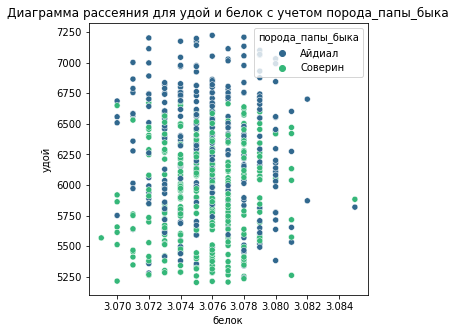

In [39]:
scatter('порода_папы_быка')

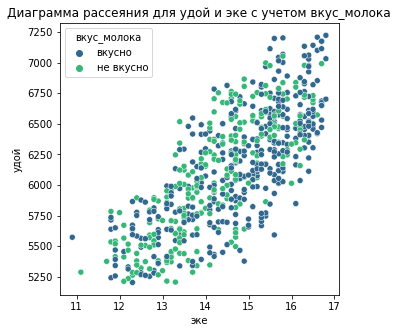

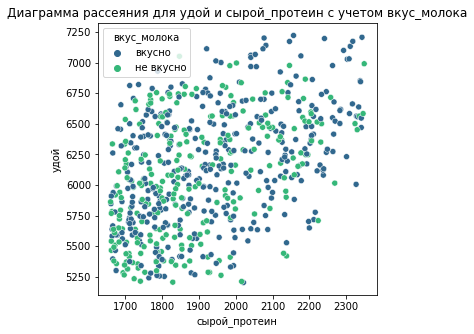

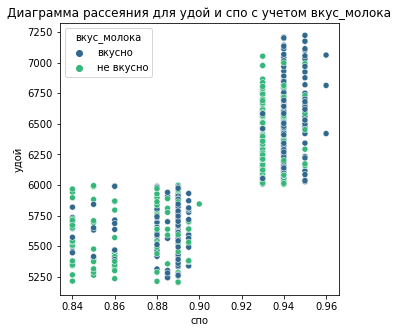

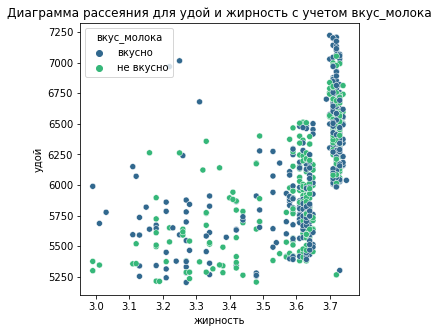

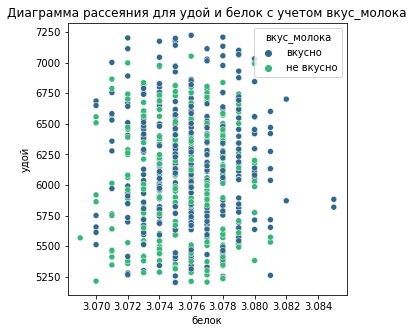

In [40]:
scatter('вкус_молока')

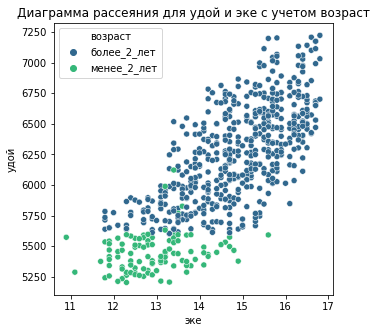

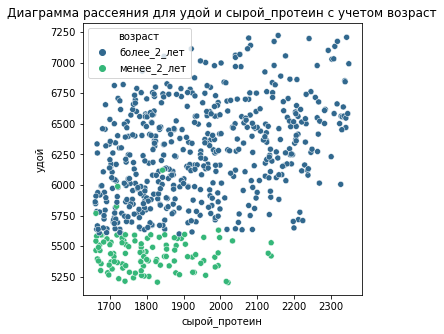

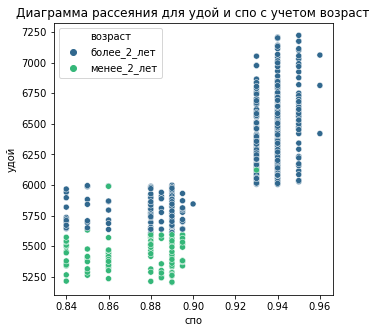

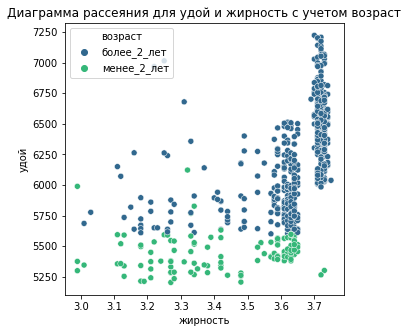

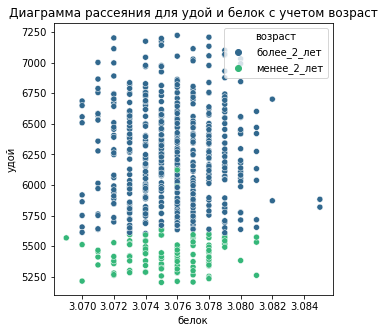

In [41]:
scatter('возраст')

**Вывод:** 
- Между целевым и входными признаком:  
    - эке присутсвует квадратичная зависимость
    - сырой_протеин прослеживается умеренная линейная зависимость (кф корреляции - 0.44)
    - спо наблюдается тенденция к кластеризации: видно разбиение на две группы
    - жирность наблюдается тенденция к кластеризации
    - белок отсутсвует линейная связь
    
    
- Линейная связь видна только между целевым признаком и сырой_протиен. Нужно вводить дополнительные признаки для устранения нелинейной зависимости: преобразовать СПО в категориальный бинарный признак, использовав границу между двумя кластерами и ввести новый признак ЭКЕ в квадрате.

- Мультиколлинеарность между входными признаками не наблюдается

## Обучение модели линейной регрессии

### Обучение модели линейной регрессии

In [42]:
lr1_data = ferma_main.drop(['id', 'вкус_молока', 'жирность', 'белок'], axis=1)
lr1_data.head()

,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,возраст
0,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
1,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
2,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
3,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет
4,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет


In [43]:
# Отбор признаков и разбиение на тренировочную и тестовую выборки
RANDOM_STATE = 42
X = lr1_data.drop('удой', axis=1)
y = lr1_data['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

In [44]:
# Кодировка категориальных признаков
encoder = OneHotEncoder(drop='first', sparse=False)

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
# Масштабирование количественных признаков
num_col_names = ['эке', 'сырой_протеин', 'спо']
scaler = StandardScaler()
scaler.fit(X_train[num_col_names])

X_train_scaled = scaler.transform(X_train[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)

X_test_scaled = scaler.transform(X_test[num_col_names])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [46]:
# Соединение закодированных и масштабированных признаков
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [47]:
# Инициализация и обучение модели
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

In [48]:
# Рассчет R²
r1 = r2_score(y_test, predictions) 
print('R² =', r1)

R² = 0.7844078173416967


count    157.000000
mean     -25.373286
std      208.615463
min     -632.814111
25%     -164.145968
50%      -34.294516
75%      108.696566
max      523.551641
Name: удой, dtype: float64

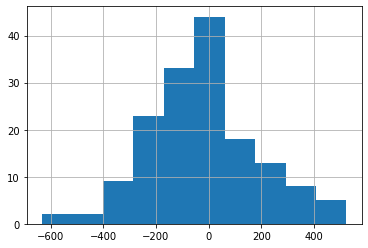

In [49]:
# Анализ остатков
residuals = y_test - predictions
residuals.hist()
residuals.describe()

<AxesSubplot:xlabel='удой', ylabel='удой'>

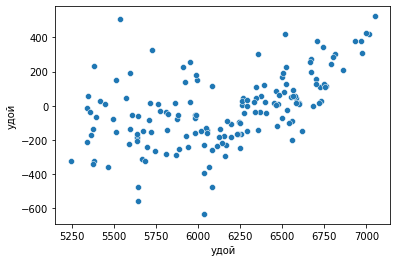

In [50]:
# Анализ остатков
sns.scatterplot(x=y_test, y=residuals)

**Вывод:** R² = 0.7844, довольно хороший показатель. Правда, анализ остатков говорит о том, что модель можно улучишить: их гистограмма нменого смещена вправо, а диаграмма рассеяния показывает неравномерность дисперсии. Думаю, что стоит убрать некоторые линейносвязанные друг с другом признаки или добавить дополнительные для улучшения качества модели.

### Обучение второй модели линейной регрессии

In [51]:
lr2_data = lr1_data
lr2_data.head()

,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,возраст
0,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
1,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
2,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
3,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет
4,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет


In [52]:
# Избавляемся от нелинейности между спо и удой
lr2_data['спо_cat'] = lr2_data['спо'].apply(lambda x: 1 if x>= 0.92 else 0)
lr2_data = lr2_data.drop('спо', axis=1)
print(lr2_data.sample(5))

     удой   эке  сырой_протеин           порода тип_пастбища порода_папы_быка  \
89   5776  13.9           1778   Вис Бик Айдиал    Холмистое           Айдиал   
351  6734  16.3           1767   Вис Бик Айдиал    Равнинное           Айдиал   
408  6272  14.1           1989   Вис Бик Айдиал    Равнинное           Айдиал   
626  5970  14.4           1837  РефлешнСоверинг    Холмистое          Соверин   
512  6122  13.4           1843   Вис Бик Айдиал    Равнинное          Соверин   

         возраст  спо_cat  
89   более_2_лет        0  
351  более_2_лет        1  
408  более_2_лет        1  
626  более_2_лет        0  
512  менее_2_лет        1  


In [53]:
# Избавляемся от нелинейности между эке и удой
lr2_data['эке_2'] = lr2_data['эке'] * lr2_data['эке']
lr2_data = lr2_data.drop('эке', axis=1)
lr2_data.head()

,удой,сырой_протеин,порода,тип_пастбища,порода_папы_быка,возраст,спо_cat,эке_2
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,0,201.64
1,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84
2,5810,1854,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,0,196.00
3,5895,2012,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,0,153.76
4,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84


In [54]:
# Отбор признаков и разбиение на тренировочную и тестовую выборки
RANDOM_STATE = 42
X2 = lr2_data.drop('удой', axis=1)
y2 = lr2_data['удой']

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, 
    y2, 
    random_state=RANDOM_STATE
)



# Кодировка категориальных признаков
encoder2 = OneHotEncoder(drop='first', sparse=False)

cat_col_names2 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_cat']

X_train_ohe2 = encoder2.fit_transform(X_train2[cat_col_names2])
X_test_ohe2 = encoder2.transform(X_test2[cat_col_names2])

encoder_col_names2 = encoder2.get_feature_names()

X_train_ohe2 = pd.DataFrame(X_train_ohe2, columns=encoder_col_names2)
X_test_ohe2 = pd.DataFrame(X_test_ohe2, columns=encoder_col_names2)



# Масштабирование количественных признаков
num_col_names2 = ['эке_2', 'сырой_протеин']
scaler2 = StandardScaler()
scaler2.fit(X_train2[num_col_names2])

X_train_scaled2 = scaler2.transform(X_train2[num_col_names2])
X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns=num_col_names2)

X_test_scaled2 = scaler2.transform(X_test2[num_col_names2])
X_test_scaled2 = pd.DataFrame(X_test_scaled2, columns=num_col_names2)



# Соединение закодированных и масштабированных признаков
X_train2 = pd.concat([X_train_ohe2, X_train_scaled2], axis=1)
X_test2 = pd.concat([X_test_ohe2, X_test_scaled2], axis=1)



# Инициализация и обучение модели
model_lr2  = LinearRegression()
model_lr2.fit(X_train2, y_train2)
predictions2 = model_lr2.predict(X_test2)


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [55]:
# Рассчет R²
r2 = r2_score(y_test2, predictions2) 
print('R² =', r2)

R² = 0.8180879926867501


count    157.000000
mean     -24.372798
std      191.495294
min     -677.411878
25%     -147.957591
50%      -27.871259
75%       60.191976
max      475.458320
Name: удой, dtype: float64

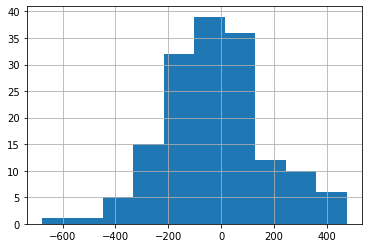

In [56]:
# Анализ остатков
residuals2 = y_test2 - predictions2
residuals2.hist()
residuals2.describe()

<AxesSubplot:xlabel='удой', ylabel='удой'>

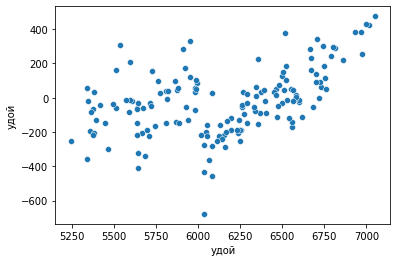

In [57]:
# Анализ остатков
sns.scatterplot(x=y_test2, y=residuals2)

**Вывод:** R² = 0.8181, показатель второй модели улчшился, в сравнении с первой. Правда, анализ остатков говорит о том, что модель можно улучишить: хоть гистограмма симметрична относительно нуля, но диаграмма рассеяния показывает всю ту же неравномерность дисперсии.

### Обучение третьей модели линейной регрессии

In [58]:
lr3_data = ferma_main.merge(ferma_dad, on=["id"])
lr3_data = lr3_data.drop(['вкус_молока', 'жирность', 'белок', 'id'], axis=1)
lr3_data['тип_пастбища'] = lr3_data['тип_пастбища'].str.lower()
lr3_data.head()

,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,возраст,имя_папы
0,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,Буйный
1,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,Соловчик
2,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,более_2_лет,Барин
3,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,более_2_лет,Буйный
4,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,Барин


In [59]:
# Избавляемся от нелинейности между спо и удой
lr3_data['спо_cat'] = lr3_data['спо'].apply(lambda x: 1 if x>= 0.92 else 0)
lr3_data = lr3_data.drop('спо', axis=1)

# Избавляемся от нелинейности между эке и удой
lr3_data['эке_2'] = lr3_data['эке'] * lr3_data['эке']
lr3_data = lr3_data.drop('эке', axis=1)
lr3_data.head()

,удой,сырой_протеин,порода,тип_пастбища,порода_папы_быка,возраст,имя_папы,спо_cat,эке_2
0,5863,1743,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,Буйный,0,201.64
1,5529,2138,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,Соловчик,0,163.84
2,5810,1854,РефлешнСоверинг,холмистое,Соверин,более_2_лет,Барин,0,196.00
3,5895,2012,РефлешнСоверинг,холмистое,Айдиал,более_2_лет,Буйный,0,153.76
4,5302,1675,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,Барин,0,163.84


In [60]:
# Отбор признаков и разбиение на тренировочную и тестовую выборки
RANDOM_STATE = 42
X3 = lr3_data.drop('удой', axis=1)
y3 = lr3_data['удой']

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3, 
    y3, 
    random_state=RANDOM_STATE
)



# Кодировка категориальных признаков
encoder3 = OneHotEncoder(drop='first', sparse=False)

cat_col_names3 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_cat', 'имя_папы']

X_train_ohe3 = encoder3.fit_transform(X_train3[cat_col_names3])
X_test_ohe3 = encoder3.transform(X_test3[cat_col_names3])

encoder_col_names3 = encoder3.get_feature_names()

X_train_ohe3 = pd.DataFrame(X_train_ohe3, columns=encoder_col_names3)
X_test_ohe3 = pd.DataFrame(X_test_ohe3, columns=encoder_col_names3)



# Масштабирование количественных признаков
num_col_names3 = ['эке_2', 'сырой_протеин']
scaler3 = StandardScaler()
scaler3.fit(X_train3[num_col_names3])

X_train_scaled3 = scaler3.transform(X_train3[num_col_names3])
X_train_scaled3 = pd.DataFrame(X_train_scaled3, columns=num_col_names3)

X_test_scaled3 = scaler3.transform(X_test3[num_col_names3])
X_test_scaled3 = pd.DataFrame(X_test_scaled3, columns=num_col_names3)



# Соединение закодированных и масштабированных признаков
X_train3 = pd.concat([X_train_ohe3, X_train_scaled3], axis=1)
X_test3 = pd.concat([X_test_ohe3, X_test_scaled3], axis=1)



# Инициализация и обучение модели
model_lr3  = LinearRegression()
model_lr3.fit(X_train3, y_train3)
predictions3 = model_lr3.predict(X_test3)

print(predictions3)

[6013.24842729 6488.05564187 5552.53582829 5589.05474506 5868.92899172
 6385.97289006 6332.2994361  6202.88467064 6751.63116258 5750.15401105
 6641.25195918 6584.03208771 5710.42419303 6748.79390265 6440.84371404
 5757.40585126 5772.47856903 6628.8798678  6406.06129223 6764.56387009
 6210.54036394 5707.41456248 5682.05379495 5357.30207677 5771.80085279
 6674.79131519 6346.05832481 5749.20748847 6542.69502084 5731.78800544
 5633.89085627 6107.22196132 6529.77050302 6316.8395856  6686.06257269
 6358.04836091 6321.12752556 6614.40229643 5452.74087883 6546.05545532
 5322.95948371 6466.93349974 6416.84617828 5610.33572327 5530.3896037
 6645.43609795 5640.3856015  6126.82620583 5867.07533378 6388.68086779
 6557.45244652 5889.4576784  5752.17969192 6196.38270397 6800.43573425
 6391.60639072 6565.36827029 6604.42450602 5888.4778151  6473.27343545
 5820.48131595 6633.6542311  6534.32682767 6031.27178385 6347.58238775
 6276.38163434 6656.82108645 6400.76341134 5413.57288862 5918.13054818
 5768.8

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [61]:
# Рассчет R²
r3 = r2_score(y_test3, predictions3) 
print('R² =', r3)

R² = 0.8247542745210406


count    157.000000
mean     -15.201522
std      188.865034
min     -712.793903
25%     -144.381634
50%      -15.967703
75%      112.027110
max      437.597704
Name: удой, dtype: float64

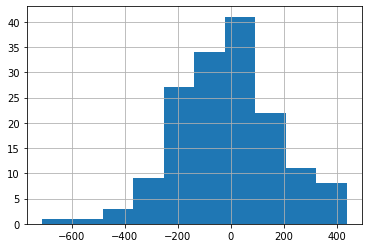

In [62]:
# Анализ остатков
residuals3 = y_test3 - predictions3
residuals3.hist()
residuals3.describe()

<AxesSubplot:xlabel='удой', ylabel='удой'>

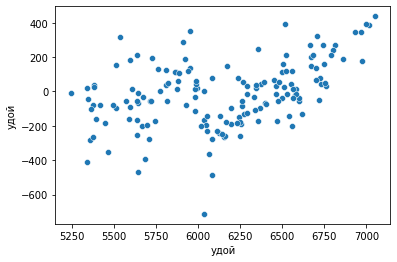

In [63]:
# Анализ остатков
sns.scatterplot(x=y_test3, y=residuals3)

**Вывод:** R² = 0.8248, показатель третьей модели еще улчшился, в сравнении со второй. Правда, анализ остатков говорит о том, что модель можно улучишить: гистограмма смещена вправо относительно нуля, однако диаграмма рассеяния показывает чуть меньшую неравномерность дисперсии.

### Сравнение качества трёх моделей линейной регрессии по R² и остаткам

In [64]:
# Рассчет R²
print('R² Первой модели =', r1)
print('R² Второй модели =', r2)
print('R² Третьей модели =', r3)

R² Первой модели = 0.7844078173416967
R² Второй модели = 0.8180879926867501
R² Третьей модели = 0.8247542745210406


count    157.000000
mean     -25.373286
std      208.615463
min     -632.814111
25%     -164.145968
50%      -34.294516
75%      108.696566
max      523.551641
Name: удой, dtype: float64

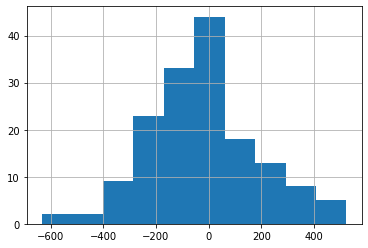

In [65]:
# Анализ остатков первой модели
residuals.hist()
residuals.describe()

<AxesSubplot:xlabel='удой', ylabel='удой'>

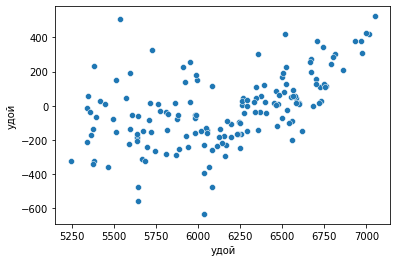

In [66]:
# Анализ остатков первой модели
sns.scatterplot(x=y_test, y=residuals)

count    157.000000
mean     -24.372798
std      191.495294
min     -677.411878
25%     -147.957591
50%      -27.871259
75%       60.191976
max      475.458320
Name: удой, dtype: float64

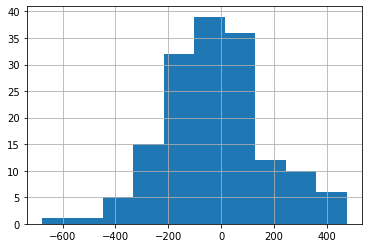

In [67]:
# Анализ остатков второй модели
residuals2.hist()
residuals2.describe()

<AxesSubplot:xlabel='удой', ylabel='удой'>

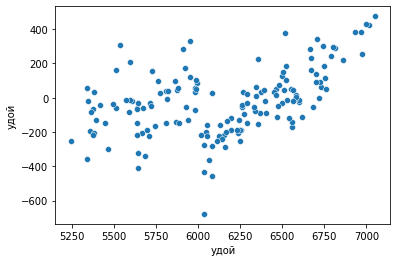

In [68]:
# Анализ остатков второй модели
sns.scatterplot(x=y_test2, y=residuals2)

count    157.000000
mean     -15.201522
std      188.865034
min     -712.793903
25%     -144.381634
50%      -15.967703
75%      112.027110
max      437.597704
Name: удой, dtype: float64

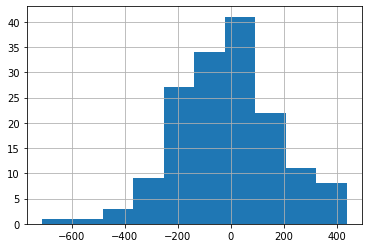

In [69]:
# Анализ остатков третьей модели
residuals3.hist()
residuals3.describe()

<AxesSubplot:xlabel='удой', ylabel='удой'>

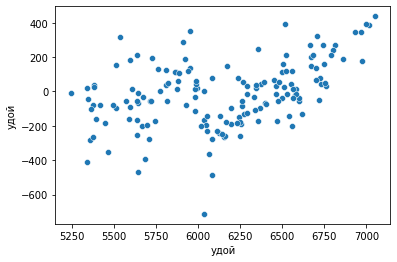

In [70]:
# Анализ остатков третьей модели
sns.scatterplot(x=y_test3, y=residuals3)

**Вывод:** R² наивысший у третьей модели, а наименьший у первой. Анализ остатков показывает, что все модели еще могут быть улучшены.

### Сравнение качества трёх моделей линейной регрессии по MSE, MAE, RMSE.

In [71]:
mae1 = mean_absolute_error(y_test, predictions)
mse1 = mean_squared_error(y_test, predictions)
rmse1 = mean_squared_error(y_test, predictions, squared=False)
print(f'''Первая модель: 
MAE: {mae1} 
MSE: {mse1} 
RMSE: {rmse1}
''')

Первая модель: 
MAE: 164.24194463474925 
MSE: 43887.015009660514 
RMSE: 209.4922791170608



In [72]:
mae2 = mean_absolute_error(y_test2, predictions2)
mse2 = mean_squared_error(y_test2, predictions2)
rmse2 = mean_squared_error(y_test2, predictions2, squared=False)
print(f'''Вторая модель: 
MAE: {mae2} 
MSE: {mse2} 
RMSE: {rmse2}
''')

Вторая модель: 
MAE: 149.03965222364602 
MSE: 37030.91131113695 
RMSE: 192.43417396901452



In [73]:
mae3 = mean_absolute_error(y_test3, predictions3)
mse3 = mean_squared_error(y_test3, predictions3)
rmse3 = mean_squared_error(y_test3, predictions3, squared=False)
print(f'''Третья модель: 
MAE: {mae3} 
MSE: {mse3}
RMSE: {rmse3}
''')

Третья модель: 
MAE: 146.16302445362322 
MSE: 35673.88988618195
RMSE: 188.8753289505592



**Вывод:** Самые маленькие значения метрик у третьей модели. Ее и возьмем.

In [74]:
lower_quantile = np.quantile(residuals3, .05)
upper_quantile = np.quantile(residuals3, .95)
print(f'Доверительный интервал в диапозоне от {lower_quantile} до {upper_quantile}')

Доверительный интервал в диапозоне от -276.28833133697697 до 317.04924256620075


### Прогнозирование удоя коров

In [75]:
lr3_to_predict = cow_buy
lr3_to_predict

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [76]:
lr3_data.head()

,удой,сырой_протеин,порода,тип_пастбища,порода_папы_быка,возраст,имя_папы,спо_cat,эке_2
0,5863,1743,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,Буйный,0,201.64
1,5529,2138,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,Соловчик,0,163.84
2,5810,1854,РефлешнСоверинг,холмистое,Соверин,более_2_лет,Барин,0,196.00
3,5895,2012,РефлешнСоверинг,холмистое,Айдиал,более_2_лет,Буйный,0,153.76
4,5302,1675,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,Барин,0,163.84


In [77]:
lr3_to_predict['спо_cat'] = 1
lr3_to_predict['спо_cat'][0] = 0
lr3_to_predict['эке_2'] = lr3_data['эке_2'].mean() * 1.05
lr3_to_predict['сырой_протеин'] = lr3_data['сырой_протеин'].mean() * 1.05
lr3_to_predict = lr3_to_predict.drop(['жирность', 'белок'], axis=1)
lr3_to_predict.head()

/tmp/ipykernel_1146/911380877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr3_to_predict['спо_cat'][0] = 0


,порода,тип_пастбища,порода_папы_быка,имя_папы,возраст,спо_cat,эке_2,сырой_протеин
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,0,224.025225,2019.947532
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,менее_2_лет,1,224.025225,2019.947532
2,РефлешнСоверинг,равнинное,Соверин,Барин,более_2_лет,1,224.025225,2019.947532
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,более_2_лет,1,224.025225,2019.947532
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,более_2_лет,1,224.025225,2019.947532


In [78]:
cat_col_name = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_cat', 'имя_папы']
num_col_name = ['эке_2', 'сырой_протеин']


cow_ohe = encoder3.transform(lr3_to_predict[cat_col_name])
cow_encoder_col_name = encoder3.get_feature_names()
cow_ohe = pd.DataFrame(cow_ohe, columns=cow_encoder_col_name)

cow_scaled = scaler3.transform(lr3_to_predict[num_col_name])
cow_scaled = pd.DataFrame(cow_scaled, columns=num_col_name)

cow_predict = pd.concat([cow_ohe, cow_scaled], axis=1)

cow_predictions = model_lr3.predict(cow_predict)
lr3_to_predict['удой'] = cow_predictions
lr3_to_predict

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,порода,тип_пастбища,порода_папы_быка,имя_папы,возраст,спо_cat,эке_2,сырой_протеин,удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,0,224.025225,2019.947532,6215.763114
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,менее_2_лет,1,224.025225,2019.947532,6338.334675
2,РефлешнСоверинг,равнинное,Соверин,Барин,более_2_лет,1,224.025225,2019.947532,6243.623422
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,более_2_лет,1,224.025225,2019.947532,6552.713023
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,более_2_лет,1,224.025225,2019.947532,6501.769713
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,менее_2_лет,1,224.025225,2019.947532,6385.003864
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,1,224.025225,2019.947532,6569.542943
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,более_2_лет,1,224.025225,2019.947532,6530.883383
8,РефлешнСоверинг,равнинное,Соверин,Барин,более_2_лет,1,224.025225,2019.947532,6243.623422
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,менее_2_лет,1,224.025225,2019.947532,6360.164314


**Вывод:** Все 20 коров из датафрейма cow_buy подходят для покупки по количеству удоя, так как у каждой из них он более 6000. Далее нужно будет сравнить вкус молока, чтобы принять решение о покупке. С целью улучшения модели были введенны дополнительные параметры для исключения нелинейной зависимости между целевым и входящими признаки, а также удалены признаки, не имеющий причинно-следственной связи с целевым. После всех этих изенений удалось добиться слебущих метрик:
- R² = 0.8248
- MAE: 146.16
- MSE: 35673.89
- RMSE: 188.88

## Обучение модели логистической регрессии

### Обучение модели логистической регрессии

In [79]:
logistic_data = ferma_main.merge(ferma_dad, on=["id"])
logistic_data = logistic_data.drop(['id'], axis=1)
logistic_data['тип_пастбища'] = logistic_data['тип_пастбища'].str.lower()
logistic_data['спо_cat'] = logistic_data['спо'].apply(lambda x: 1 if x>= 0.92 else 0)
logistic_data = logistic_data.drop('спо', axis=1)
logistic_data['эке_2'] = logistic_data['эке'] * logistic_data['эке']
logistic_data = logistic_data.drop('эке', axis=1)
logistic_data['вкус_молока'] = logistic_data['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
logistic_data.head()

,удой,сырой_протеин,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,имя_папы,спо_cat,эке_2
0,5863,1743,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,1,более_2_лет,Буйный,0,201.64
1,5529,2138,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,1,менее_2_лет,Соловчик,0,163.84
2,5810,1854,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,0,более_2_лет,Барин,0,196.00
3,5895,2012,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,0,более_2_лет,Буйный,0,153.76
4,5302,1675,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,1,менее_2_лет,Барин,0,163.84


In [80]:
# Отбор признаков и разбиение на тренировочную и тестовую выборки
RANDOM_STATE = 42
Xl = logistic_data.drop('вкус_молока', axis=1)
yl = logistic_data['вкус_молока']

X_trainl, X_testl, y_trainl, y_testl = train_test_split(
    Xl, 
    yl, 
    random_state=RANDOM_STATE
)



# Кодировка категориальных признаков
encoderl = OneHotEncoder(drop='first', sparse=False)

cat_col_namesl = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_cat', 'имя_папы']

X_train_ohel = encoderl.fit_transform(X_trainl[cat_col_namesl])
X_test_ohel = encoderl.transform(X_testl[cat_col_namesl])

encoder_col_namesl = encoderl.get_feature_names()

X_train_ohel = pd.DataFrame(X_train_ohel, columns=encoder_col_namesl)
X_test_ohel = pd.DataFrame(X_test_ohel, columns=encoder_col_namesl)



# Масштабирование количественных признаков
num_col_namesl = ['удой', 'эке_2', 'сырой_протеин', 'жирность', 'белок']
scalerl = StandardScaler()
scalerl.fit(X_trainl[num_col_namesl])

X_train_scaledl = scalerl.transform(X_trainl[num_col_namesl])
X_train_scaledl = pd.DataFrame(X_train_scaledl, columns=num_col_namesl)

X_test_scaledl = scalerl.transform(X_testl[num_col_namesl])
X_test_scaledl = pd.DataFrame(X_test_scaledl, columns=num_col_namesl)



# Соединение закодированных и масштабированных признаков
X_trainl = pd.concat([X_train_ohel, X_train_scaledl], axis=1)
X_testl = pd.concat([X_test_ohel, X_test_scaledl], axis=1)



# Инициализация и обучение модели
model_logstic  = LogisticRegression()
model_logstic.fit(X_trainl, y_trainl)
predictions_log = model_logstic.predict(X_testl)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [81]:
accuracy = accuracy_score(y_testl, predictions_log)
recall = recall_score(y_testl, predictions_log)
precision = precision_score(y_testl, predictions_log)
print('accuracy: ', accuracy)
print('recall: ', recall)
print('precision: ', precision)

accuracy:  0.6242038216560509
recall:  0.8636363636363636
precision:  0.6178861788617886


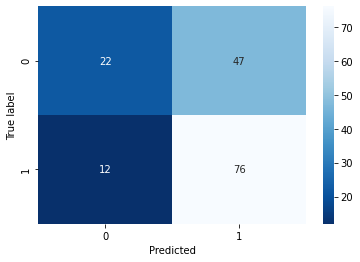

In [82]:
cm = confusion_matrix(y_testl, predictions_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

### Анализ модели логистической регрессии

Критичнее всего при покупке коров ошибка первого рода. Поэтому нужно увеличить показатель precision, ведь главное для заказчика — вкусное молоко. 

In [83]:
y_proba = model_logstic.predict_proba(X_testl)[:,1]

data = pd.DataFrame(zip(y_testl, y_proba),
columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.sample(5))

     y_valid   y_proba
67         0  0.481823
27         0  0.617272
129        1  0.593266
28         0  0.546170
104        0  0.586993


In [84]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 20,endpoint=False)]
print(thresholds)

# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 0 if x>= i else 1)
    
# выведем 5 случайных строк
print(data.sample(5))

[0.1, 0.15, 0.19, 0.24, 0.28, 0.32, 0.37, 0.42, 0.46, 0.5, 0.55, 0.6, 0.64, 0.68, 0.73, 0.77, 0.82, 0.86, 0.91, 0.96]
     y_valid   y_proba  y_pred_0.1  y_pred_0.15  y_pred_0.19  y_pred_0.24  \
148        0  0.594887           0            0            0            0   
1          1  0.674626           0            0            0            0   
79         0  0.602655           0            0            0            0   
77         0  0.680622           0            0            0            0   
66         1  0.842129           0            0            0            0   

     y_pred_0.28  y_pred_0.32  y_pred_0.37  y_pred_0.42  ...  y_pred_0.55  \
148            0            0            0            0  ...            0   
1              0            0            0            0  ...            0   
79             0            0            0            0  ...            0   
77             0            0            0            0  ...            0   
66             0            0     

In [85]:
data.sample(10)

,y_valid,y_proba,y_pred_0.1,y_pred_0.15,y_pred_0.19,y_pred_0.24,y_pred_0.28,y_pred_0.32,y_pred_0.37,y_pred_0.42,...,y_pred_0.55,y_pred_0.6,y_pred_0.64,y_pred_0.68,y_pred_0.73,y_pred_0.77,y_pred_0.82,y_pred_0.86,y_pred_0.91,y_pred_0.96
95,1,0.728760,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
10,1,0.747060,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
46,0,0.324938,0,0,0,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
143,0,0.461848,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
109,1,0.659433,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
64,1,0.759691,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
111,0,0.731938,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
132,0,0.569436,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
2,1,0.675311,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
137,0,0.584220,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1


In [86]:
for i in thresholds:
    cm = confusion_matrix(y_testl, data['y_pred_'+str(i)])
    if cm[0][0] / (cm[0][0] + cm[0][1]) == 0:
        print('Порог:', i)
        limit = i
        break
    

Порог: 0.86


**Вывод:** При пороге в 0.86 достигается наиболее подходящий precision.

### Прогнозирование вкуса молока коров

In [87]:
log_to_predict = cow_buy
log_to_predict['удой'] = lr3_to_predict['удой']
log_to_predict['имя_папы'] = lr3_to_predict['имя_папы']
log_to_predict.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,спо_cat,эке_2,сырой_протеин,удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0,224.025225,2019.947532,6215.763114
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,1,224.025225,2019.947532,6338.334675
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,1,224.025225,2019.947532,6243.623422
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,1,224.025225,2019.947532,6552.713023
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,1,224.025225,2019.947532,6501.769713


In [88]:
cat_col_namel = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_cat', 'имя_папы']
num_col_namel = ['удой', 'эке_2', 'сырой_протеин', 'жирность', 'белок']


cow_ohel = encoderl.transform(log_to_predict[cat_col_namel])
cow_encoder_col_namel = encoderl.get_feature_names()
cow_ohel = pd.DataFrame(cow_ohel, columns=cow_encoder_col_namel)

cow_scaledl = scalerl.transform(log_to_predict[num_col_namel])
cow_scaledl = pd.DataFrame(cow_scaledl, columns=num_col_namel)

cow_predictl = pd.concat([cow_ohel, cow_scaledl], axis=1)

cow_predictionsl = model_logstic.predict_proba(cow_predictl)
cow_buy['вкус_молока'] = cow_predictionsl[:,0]

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [89]:
cow_buy['вкус_молока'] = cow_buy['вкус_молока'].apply(lambda x: 'вкусно' if x>= 0.86 else 'не вкусно')
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,спо_cat,эке_2,сырой_протеин,удой,вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0,224.025225,2019.947532,6215.763114,не вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,1,224.025225,2019.947532,6338.334675,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,1,224.025225,2019.947532,6243.623422,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,1,224.025225,2019.947532,6552.713023,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,1,224.025225,2019.947532,6501.769713,не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,1,224.025225,2019.947532,6385.003864,вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,1,224.025225,2019.947532,6569.542943,не вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,1,224.025225,2019.947532,6530.883383,не вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,1,224.025225,2019.947532,6243.623422,не вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,1,224.025225,2019.947532,6360.164314,не вкусно


## Итоговые выводы

После загрузки данных было выявлено, что данные соответствуют описанию задачи. Названия и типы некоторых столбцов необходимо было изменить в соответствии со стандартами оформления данных на этапе предобработки.

На этапе предобработке данных названия столбцов и их типы данных были приведены к нормальному виду во всех датафремах, также были удалены явные дубликаты, а неявные обработаны. Пропуски в данных отсутствовали.

Во время исследовательского анализа дыннх было выявлено:
- Датафрейм ferma_main:
    - В удое присутсвтвовали выбросы в районе 45000, скорее всего данные записаны некорректно. Было принятно решение удалить эти значения. В остальных признаках аномалий и выбросов замечено не было.
    - Нормальное распределение наблюдается только в признаках: "удой" и "эке". В признаке "белок" оно бимодальное, а в "сырой_протеин", "спо" и "жирность" - ненормальное.
    - Коров породы Вис Бик Айдиал больше, чем РефлешнСоверинг примерно на 10%  (0.593005 и 0.406995 соответсвенно)
    - Коровы немного чаще предпочитают Холмистое пастбище, а не Равнинное (0.558029 и 0.441971 соответсвенно)
    - Отцами выступают породы Айдиал и Соверин практически в равно количестве.
    - Коровы дают примерно 41% невкусного молока, это довольно выоский показатель, учитывая что он является основной метрикой заказчика.
    - 82.5% коров старше двух лет.


- Датафрейм ferma_dad:
    - Самым плодовитым отцом является Барин, на него приходится 38.15% всего потомтсва фермы, далее идет Буйный с долей 34.18%. У Соловчика около 17.48%, а у Геркулеса - 10.17. На первых двух быков приходится около трех четвертых потомтсва.


- Датафрейм cow_buy:
    - Показатели белка и жирности имеют бимодальное распределение. Медиана и среднее значение сопоставимы друг с другом.
    - Коровы пород РефлешнСоверинг и Вис Бик Айдиал представлены в равном объеме.
    - Коровы пасущуиеся на равнинное и в холмистой местности также представлены в равном объеме.
    - Отцом большей части коров является бык породы Соверин (62.5%) Айдиал же - 37.5%.
    - Самым плодовитым отцом является Буйный, на него приходится 43.75% всего потомтсва cow_buy, далее идет Геркулес с долей 31.25%. У Барина и Соловчика равная доля в 12.5%. На первых двух быков приходится 75% потомтсва cow_buy.
    - В cow_buy большинство буренек старше 2 лет (68.75%), младше же только 31.25%


На этапе корреляционного анализа была получена следующая информация:
- Между целевым и входными признаком:  
    - эке присутсвует квадратичная зависимость
    - сырой_протеин прослеживается умеренная линейная зависимость (кф корреляции - 0.44)
    - спо наблюдается тенденция к кластеризации: видно разбиение на две группы
    - жирность наблюдается тенденция к кластеризации
    - белок отсутсвует линейная связь
    
    
- Линейная связь видна только между целевым признаком и сырой_протиен. Нужно вводить дополнительные признаки для устранения нелинейной зависимости: преобразовать СПО в категориальный бинарный признак, использовав границу между двумя кластерами и ввести новый признак ЭКЕ в квадрате.

- Мультиколлинеарность между входными признаками не наблюдается


Была выбрана модель регрессии с показателем R² = 0.8248. То есть она верно предсказывает удой коров в 82.5% случаев, что является хорошим показателем. С целью улучшения модели были введенны дополнительные параметры для исключения нелинейной зависимости между целевым и входящими признаки, а также удалены признаки, не имеющий причинно-следственной связи с целевым. 

Для предсказания вкуса молока была взята модель логистической регрессии, которая определяла вкус молока по входным параметрам. Порог предлагется установить на уровне 0.86.
Такие метрики моделей классификации, как accuracy, recall и precision, в совокупности важны при анализе рисков или экономических расчётов, так как нельзя опираться на какой-то один из них при ананлизе результатов модели, поскольку каждый из них не учитывает дополнительные параметры при оценке определенного признака.  

Предлагаю отобрать для покупки коров под номерами: 5, 12, 17, так как для них был спрогнозирован удой более 6000 килограммов в год, а также вкусное молоко.

Рекомендую вести наблюдение за коровами и увеличить количество собираемых данных с целью повышения точности текущей моедли посредствам добавления в нее новых исходных данных. 